In [1]:
# Import the general libraries

import os 
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt

# Import all specific modules

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Verify the dataset path 

os.listdir('../input/heart-disease-uci')

['heart.csv']

In [3]:
# Import the dataset

df_heart = pd.read_csv('../input/heart-disease-uci/heart.csv')

In [4]:
# Show the dataset

df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Save the dataset without target row

df_heart_features = df_heart.drop(['target'], axis=1)
df_heart_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
# Create a df just with target row

df_target = df_heart['target']
df_target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
# We gonna normalize the data

df_heart_features = StandardScaler().fit_transform(df_heart_features)

In [8]:
# Cut train test and test split 

X_train, X_test, y_train, y_test = train_test_split(df_heart_features, df_target, test_size=0.3, random_state=42)

In [9]:
# We gonna review the size

print(" X_train size: " ,X_train.shape)
print(" y_train size: " ,y_train.shape)

 X_train size:  (212, 13)
 y_train size:  (212,)


In [10]:
# Config to apply pca 

pca = PCA(n_components = 3)

In [11]:
# we fit pca for own train data

pca.fit(X_train)

PCA(n_components=3)

In [12]:
# We are the same with IPCA and we add batch_size to keep training slowly and combine with the final result

ipca = IncrementalPCA(n_components=3, batch_size=10)

In [13]:
# we fit ipca for own train data 

ipca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

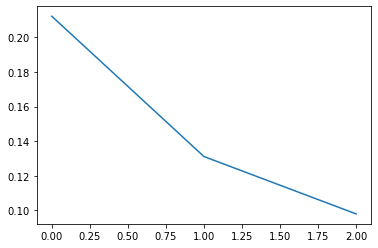

In [14]:
'''We are going to graph what the pca automatically generated for me on the x-axis, against the y-axis, 
the value of the importance in each of these components, so we can identify which ones are really important 
for our model'''

plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

In [15]:
# We gonna config the logistic regression 

regLog = LogisticRegression(solver='lbfgs')

In [16]:
# We gonna config the train data of PCA

df_train = pca.transform(X_train)
df_test = pca.transform(X_test)

In [17]:
# We send data at logistic regression

regLog.fit(df_train, y_train)

LogisticRegression()

In [18]:
# We gonna calcula the score

print("Score PCA: ", regLog.score(df_test, y_test))

Score PCA:  0.8351648351648352


In [19]:
# We gonna config the train data of IPCA

df_train = ipca.transform(X_train)
df_test = ipca.transform(X_test)

In [20]:
# We send data at logistic regression

regLog.fit(df_train, y_train)

LogisticRegression()

In [21]:
# We gonna calcula the score

print("SCORE IPCA: ", regLog.score(df_test, y_test))

SCORE IPCA:  0.8351648351648352


## Apply a kernel PCA

In [22]:
# Apply polynomial kernel function
kpca = KernelPCA(n_components=4, kernel='poly' )
    
# Fit the data
kpca.fit(X_train)
 
# Apply the algoritm to test and train dataset
dt_train = kpca.transform(X_train)
dt_test = kpca.transform(X_test)
 
# Apply logistic regression later reduce the dimensionality
logistic = LogisticRegression(solver='lbfgs')
 
# Train the model
logistic.fit(dt_train, y_train)
 
# Print the results
print("SCORE KPCA: ", logistic.score(dt_test, y_test))

SCORE KPCA:  0.8241758241758241


## Apply All Clasifiers

In [23]:
knn_class = KNeighborsClassifier().fit(X_train, y_train)
knn_prediction = knn_class.predict(X_test)
print('='*64)
print('SCORE con KNN: ', accuracy_score(knn_prediction, y_test))

SCORE con KNN:  0.8791208791208791


In [24]:
estimators = {
        'LogisticRegression' : LogisticRegression(),
        'SVC' : SVC(),
        'LinearSVC' : LinearSVC(),
        'SGD' : SGDClassifier(loss="hinge", penalty="l2", max_iter=5),
        'KNN' : KNeighborsClassifier(),
        'DecisionTreeClf' : DecisionTreeClassifier(),
        'RandomTreeForest' : RandomForestClassifier(random_state=0)
    }
for name, estimator in estimators.items():
    bag_class = BaggingClassifier(base_estimator=estimator, n_estimators=50).fit(X_train, y_train)
    bag_predict = bag_class.predict(X_test)
    print('='*64)
    print('SCORE Bagging with {} : {}'.format(name, accuracy_score(bag_predict, y_test)))

SCORE Bagging with LogisticRegression : 0.8131868131868132
SCORE Bagging with SVC : 0.8021978021978022
SCORE Bagging with LinearSVC : 0.7912087912087912
SCORE Bagging with SGD : 0.8241758241758241
SCORE Bagging with KNN : 0.8791208791208791
SCORE Bagging with DecisionTreeClf : 0.7912087912087912
SCORE Bagging with RandomTreeForest : 0.8241758241758241


## Boosting

GradientBoostingClassifier:  0.7912087912087912


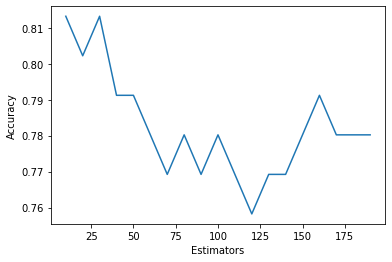

In [25]:
# Definimos nuestro clasificador, definimos 50 arbole y le agregamos el ajuste
# Define the classifier, define 50 threes and add the fit
boost = GradientBoostingClassifier(n_estimators=50).fit(X_train, y_train)

# Generate the predictions 
boost_pred = boost.predict(X_test)
print("="*64)
print("GradientBoostingClassifier: ", accuracy_score(boost_pred, y_test)) 

estimators = range(10, 200, 10)
total_accuracy = []
for i in estimators:
    boost = GradientBoostingClassifier(n_estimators=i).fit(X_train, y_train)
    boost_pred = boost.predict(X_test)

    total_accuracy.append(accuracy_score(y_test, boost_pred))
    
plt.plot(estimators, total_accuracy)
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.show()